# DS1001 Capstone

Spotipythons: Allison Redfern, Annabelle Huether, Mary Nwangwu, Isha Slavin

In [40]:
random.seed(17669368) #Allison Redfern's N-number 

## Data Cleansing

In [128]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import statistics as stat
import sys
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model

In [129]:
anime = pd.read_csv('NYU_IntroCapstone_ANIME - Sheet1.csv')
broadway = pd.read_csv('NYU_IntroCapstone_BROADWAY - Sheet1.csv')
classical = pd.read_csv('NYU_IntroCapstone_CLASSICAL - Sheet1.csv')
country = pd.read_csv('NYU_IntroCapstone_COUNTRY - Sheet1.csv')
dance_electronic = pd.read_csv('NYU_IntroCapstone_DANCE_ELECTRONIC - Sheet1.csv')
disney = pd.read_csv('NYU_IntroCapstone_DISNEY - Sheet1.csv')
happy_holidays = pd.read_csv('NYU_IntroCapstone_HAPPY_HOLIDAYS - Sheet1.csv')
hip_hop = pd.read_csv('NYU_IntroCapstone_HIP_HOP - Sheet1.csv')
jazz = pd.read_csv('NYU_IntroCapstone_JAZZ - Sheet1.csv')
latin = pd.read_csv('NYU_IntroCapstone_LATIN - Sheet1.csv')
pop = pd.read_csv('NYU_IntroCapstone_POP - Sheet1.csv')
rock = pd.read_csv('NYU_IntroCapstone_ROCK - Sheet1.csv')


data_df = pd.concat([anime, broadway, classical, country, dance_electronic, disney, happy_holidays, hip_hop, jazz, latin, pop, rock], axis=0)
data_df = data_df.drop_duplicates(subset=['Title', 'Artist'])
data_df = data_df.drop('#', axis = 1)
data_df = data_df.dropna(axis=0, how='any').reset_index(drop=True) #remove rows that have any NaN
display(data_df)

,Title,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,A.Sep,Rnd,Genre
0,KICK BACK,Kenshi Yonezu,2022-10-12,102.0,94.0,58.0,-5.0,29.0,3:13,0.0,88.0,24.0,4667.0,Anime
1,vendetta!,MUPP,2022-05-20,126.0,91.0,71.0,-4.0,67.0,1:47,18.0,83.0,111.0,4155.0,Anime
2,Limbo,Freddie Dredd,2022-08-11,75.0,62.0,80.0,-6.0,46.0,2:50,3.0,82.0,35.0,7509.0,Anime
3,Disaster,KSLV Noh,2021-06-21,117.0,61.0,82.0,-6.0,51.0,1:24,2.0,79.0,112.0,9349.0,Anime
4,This fffire - New Version,Franz Ferdinand,2004-11-15,146.0,89.0,44.0,-6.0,64.0,3:38,3.0,74.0,113.0,4368.0,Anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887,Anti-glory,Horsegirl,2022-03-09,135.0,88.0,45.0,-7.0,43.0,3:31,2.0,36.0,758.0,6102.0,Rock
14888,I'm a Moth!!,LIA LIA,2022-02-09,165.0,86.0,60.0,-7.0,68.0,2:07,4.0,39.0,759.0,4727.0,Rock
14889,Boy,PÆRISH,2021-11-12,71.0,77.0,17.0,-5.0,9.0,3:22,0.0,25.0,760.0,3852.0,Rock
14890,Bullet Farm,Dead Pony,2022-03-24,83.0,89.0,54.0,-5.0,66.0,3:11,0.0,35.0,761.0,2261.0,Rock


## Inference

Is there a difference between an attribute (not using popularity index, including duration) in one genre vs another?

In [130]:
inference_df = data_df

In [131]:
# length cleansing
def get_sec(time_str):
    time_str = str(time_str)
    m, s = time_str.split(':')
    return int(m) * 60 + int(s)


for i in range(14892):
    if i == 2979:
        inference_df.iloc[i,8] = 1578
    elif i == 4928:
        inference_df.iloc[i,8] = 1623
    elif i == 9846:
        inference_df.iloc[i,8] = 1707
    elif i == 10249:
        inference_df.iloc[i,8] = 2573
    elif i == 10386:
        inference_df.iloc[i,8] = 1572
    elif i == 10404:
        inference_df.iloc[i,8] = 1562
    elif i == 10714:
        inference_df.iloc[i,8] = 1904
    else:
        inference_df.iloc[i,8] = get_sec(inference_df.iloc[i,8])
        
inference_df['Length'] = inference_df['Length'].astype(float)

In [150]:
# create genre & attributes list: 
genres = inference_df.Genre.unique()
attributes = inference_df.columns.values.tolist()[4:11]

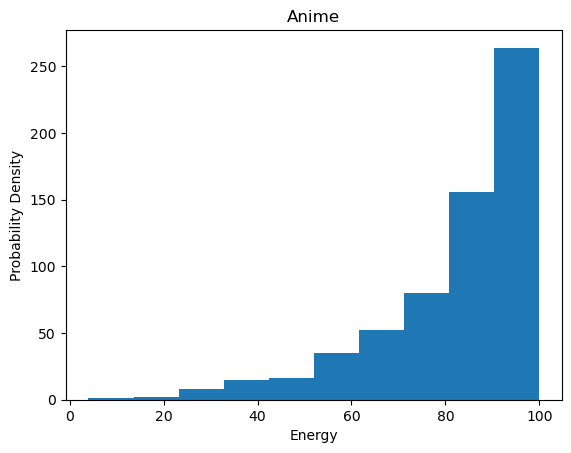

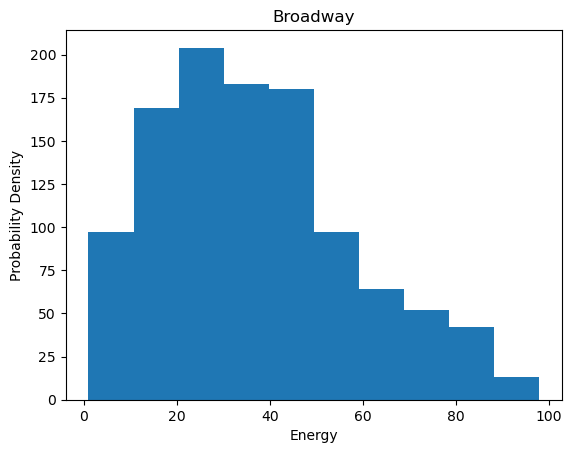

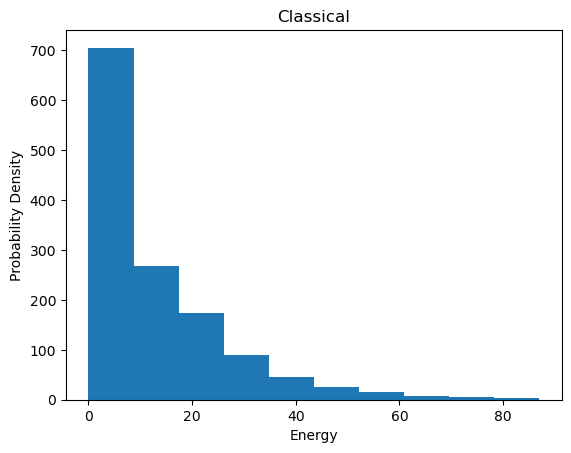

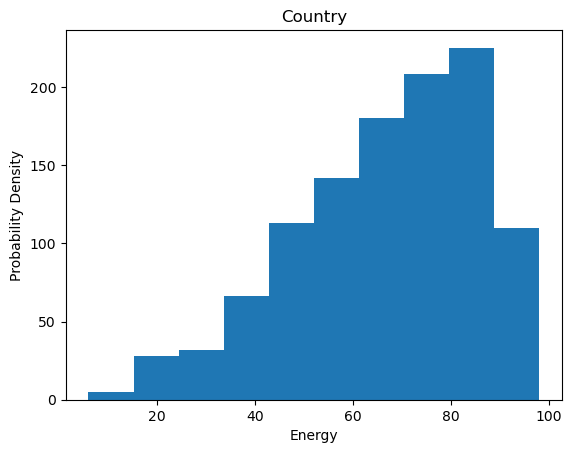

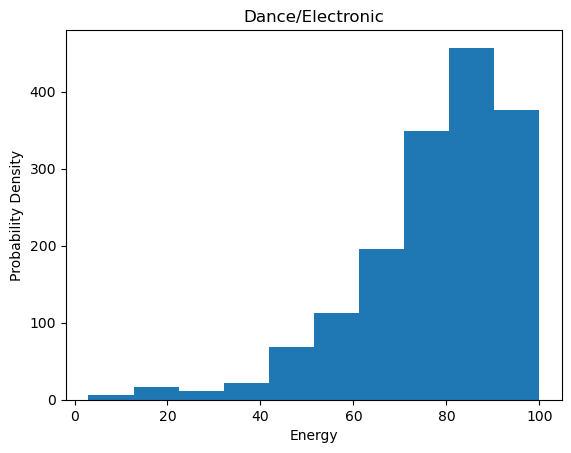

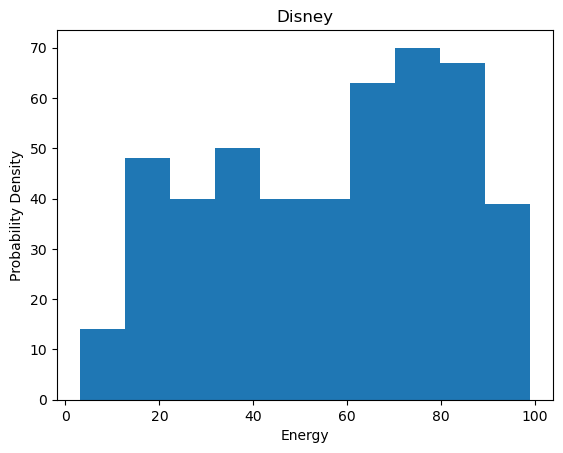

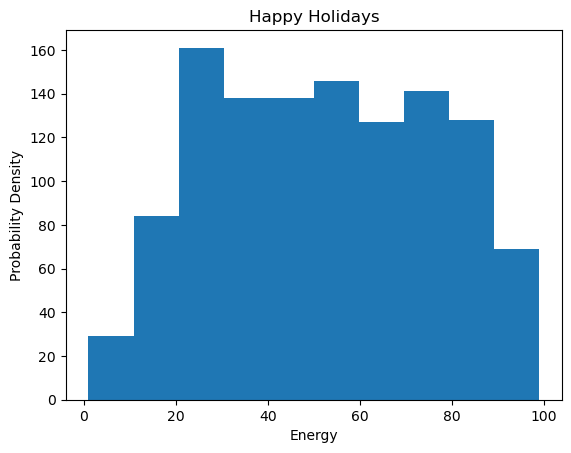

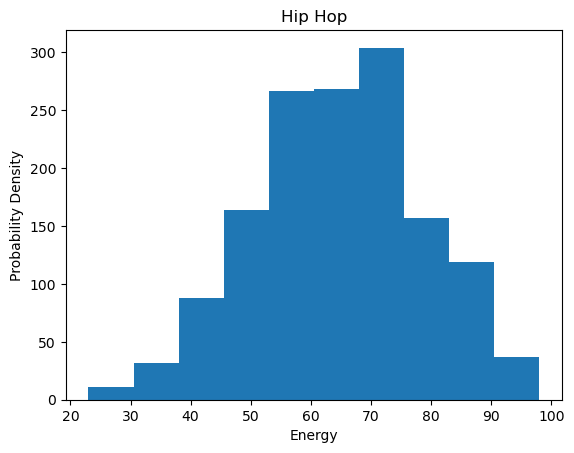

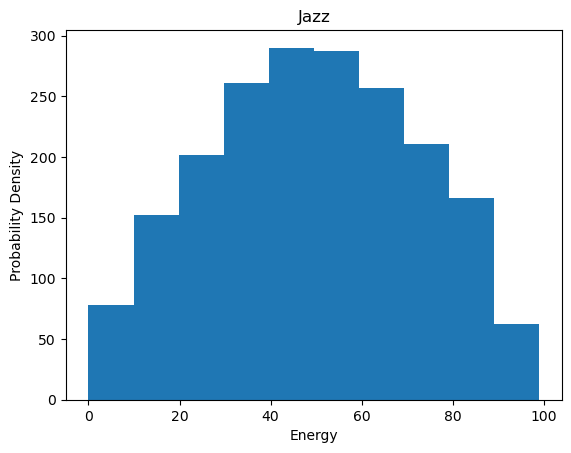

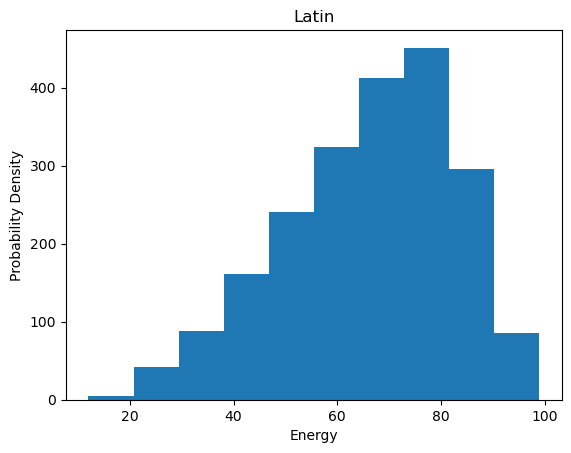

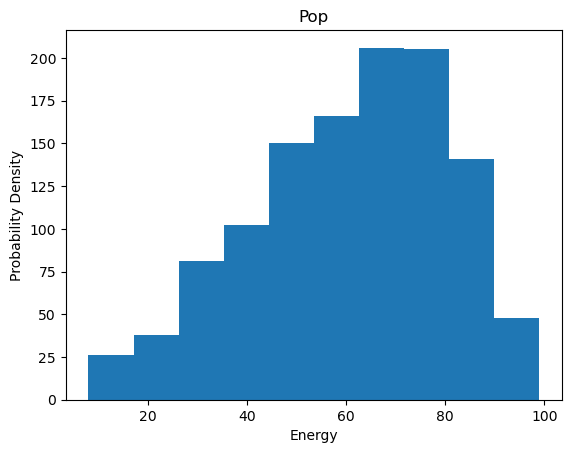

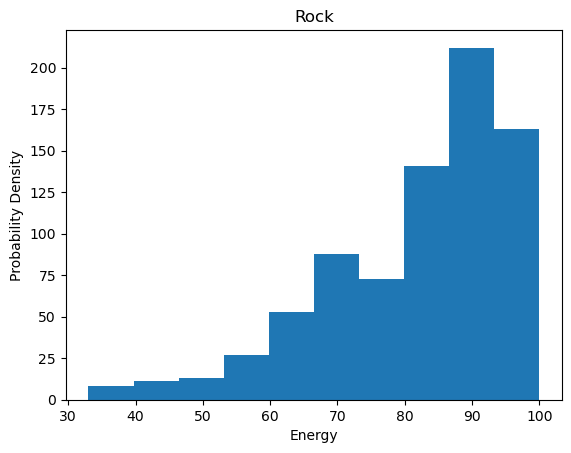

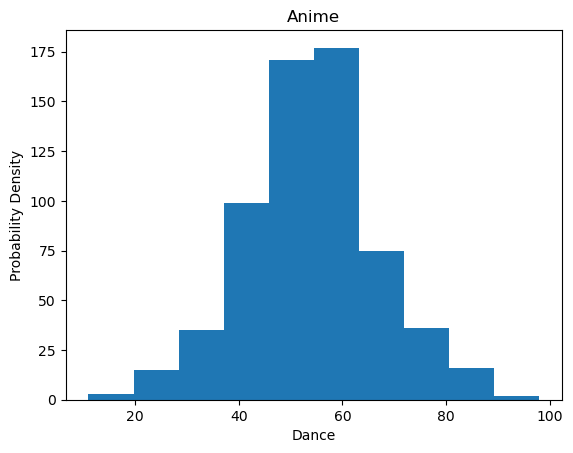

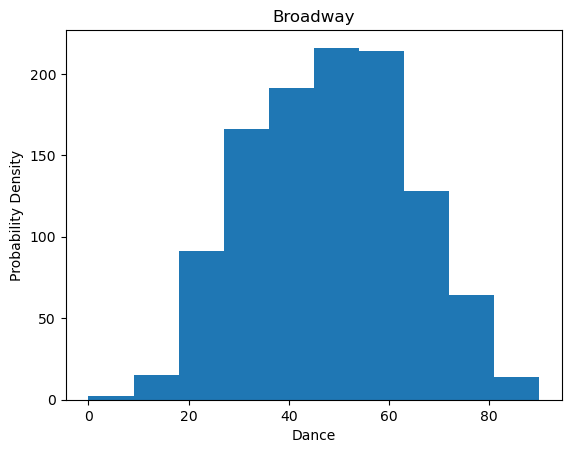

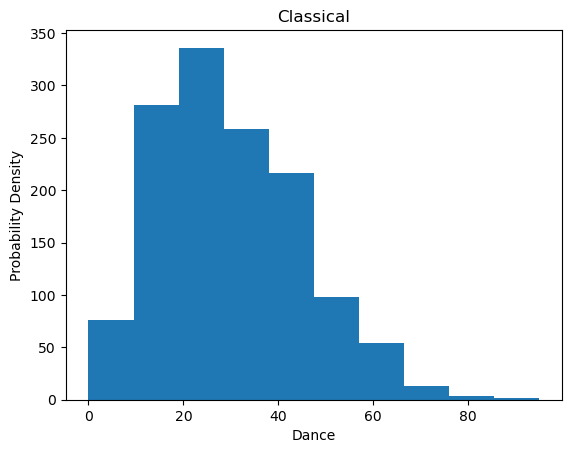

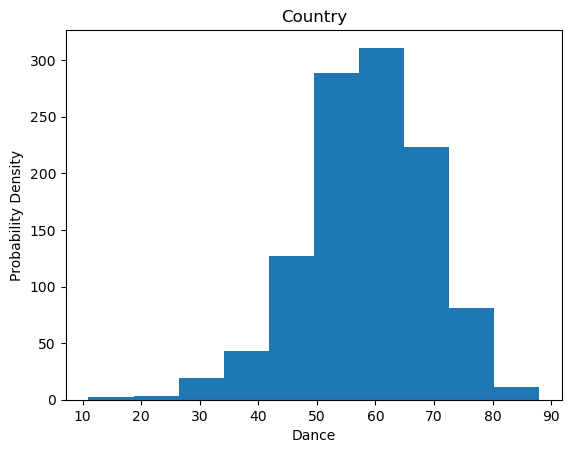

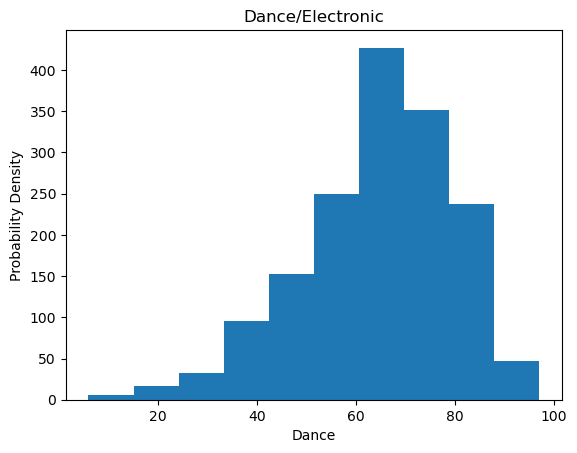

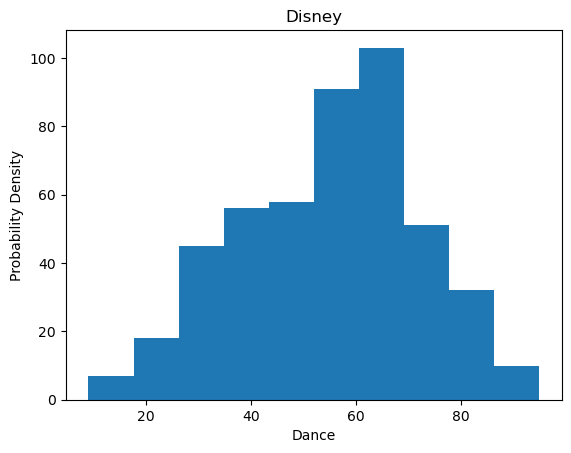

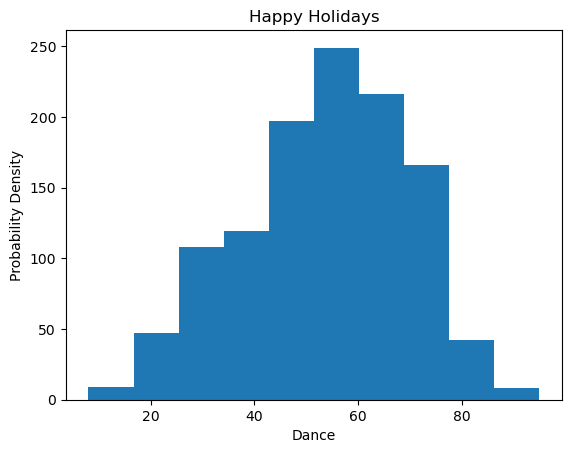

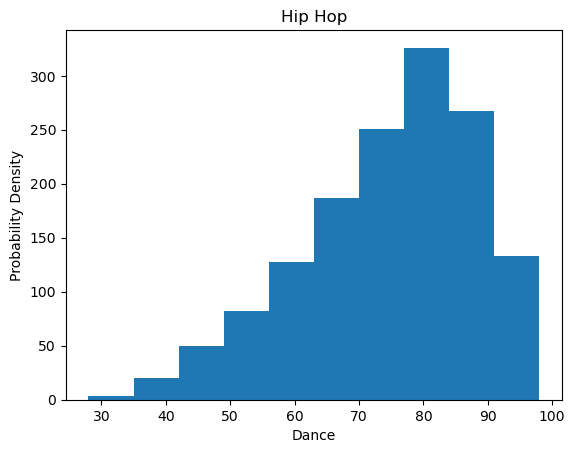

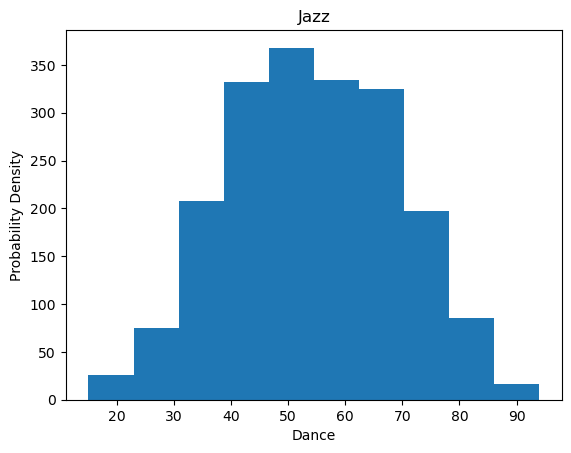

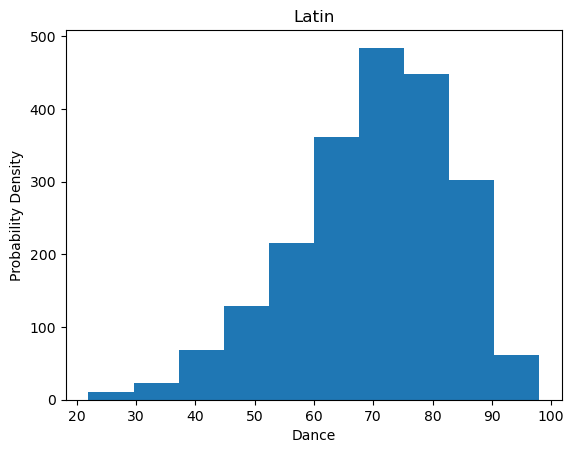

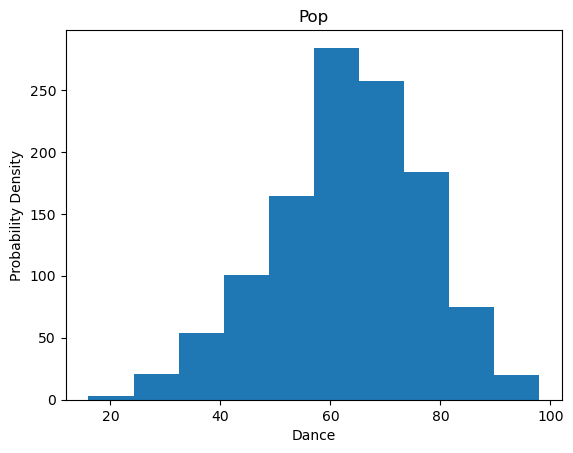

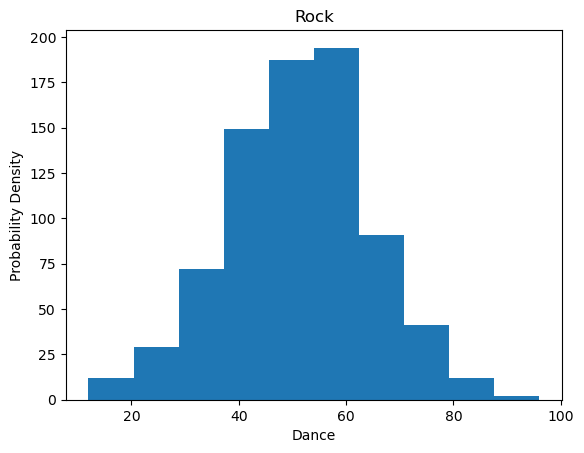

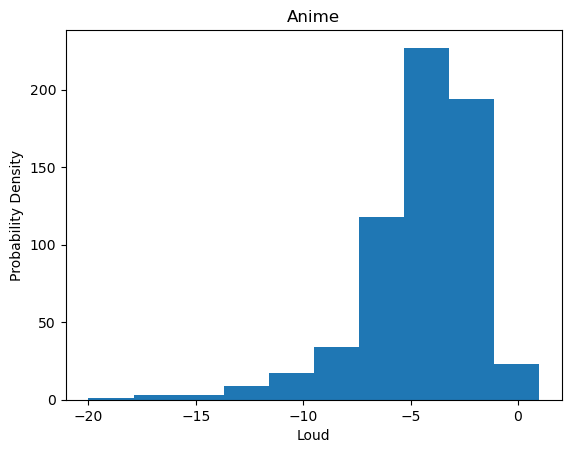

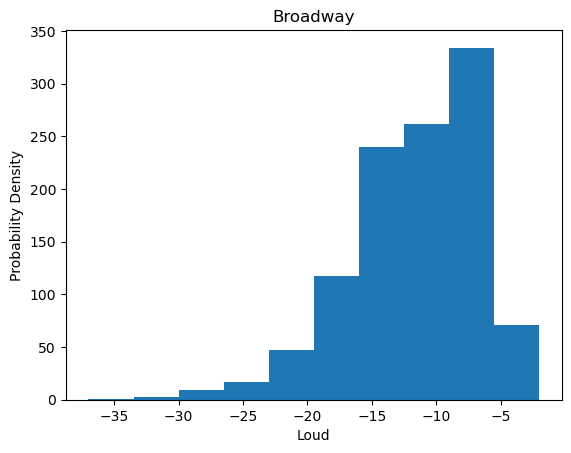

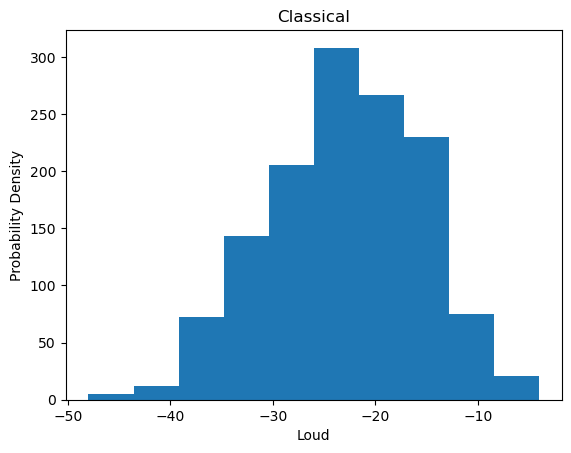

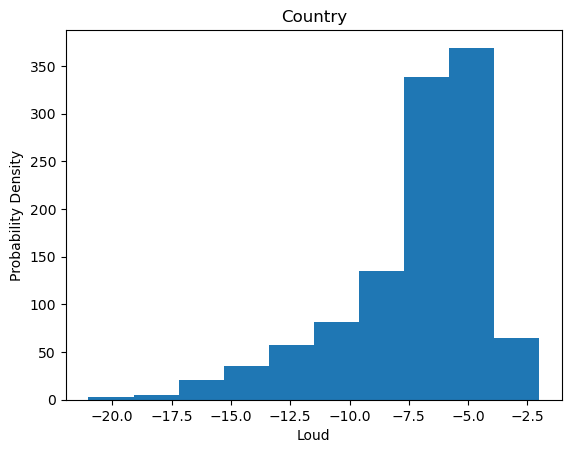

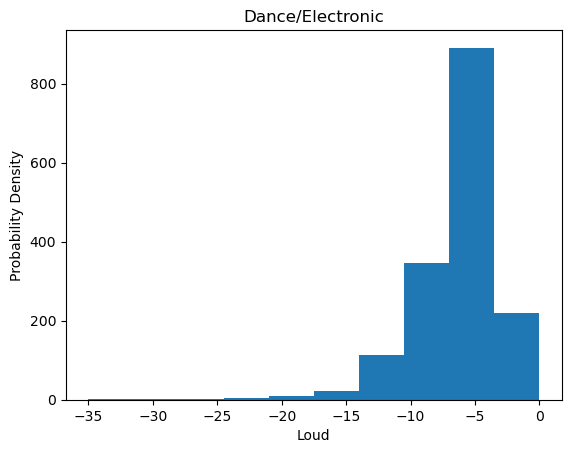

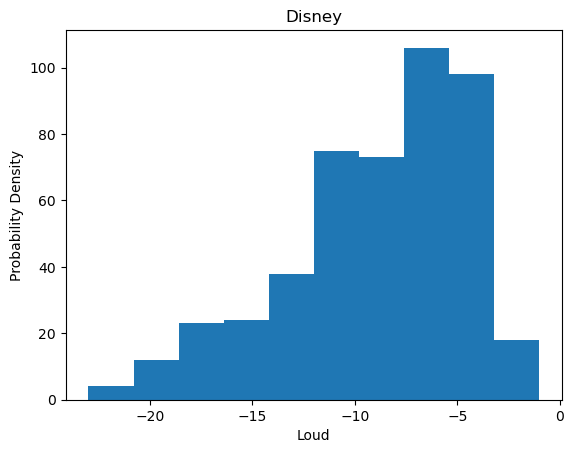

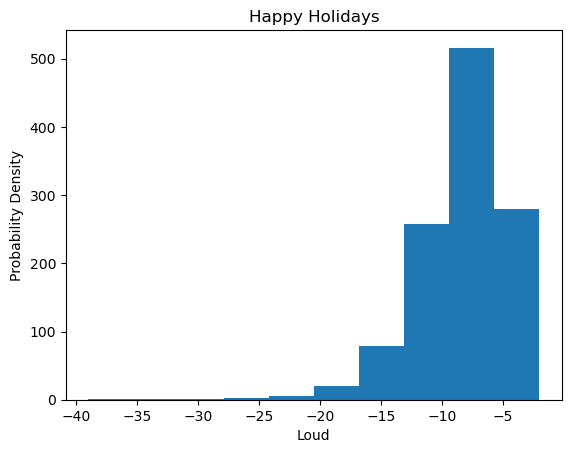

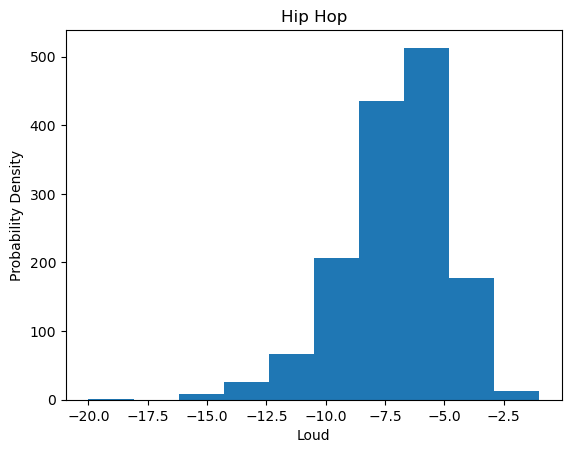

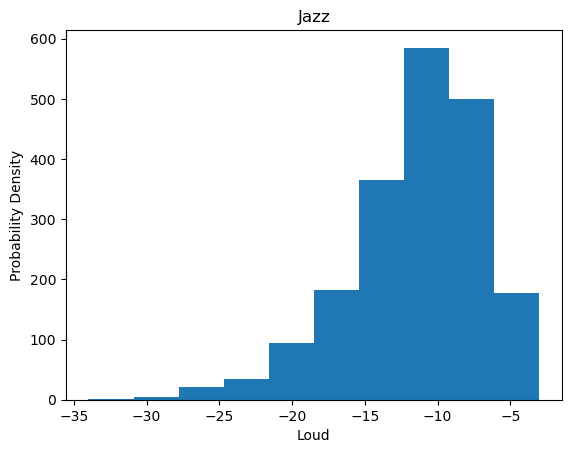

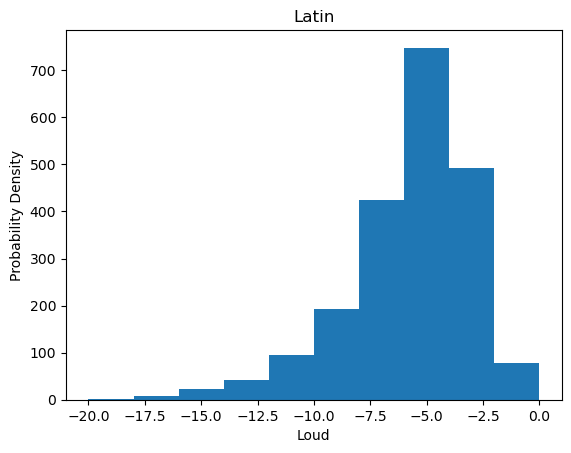

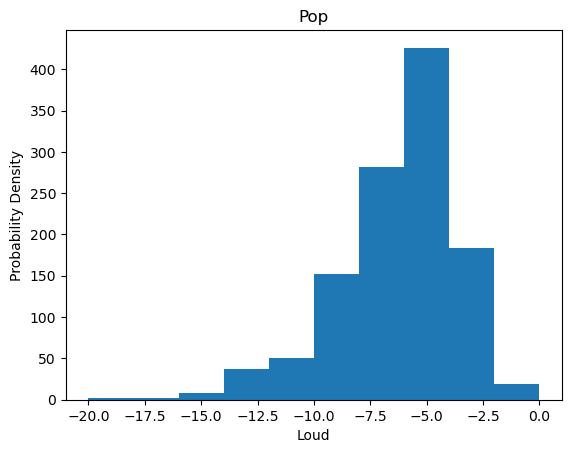

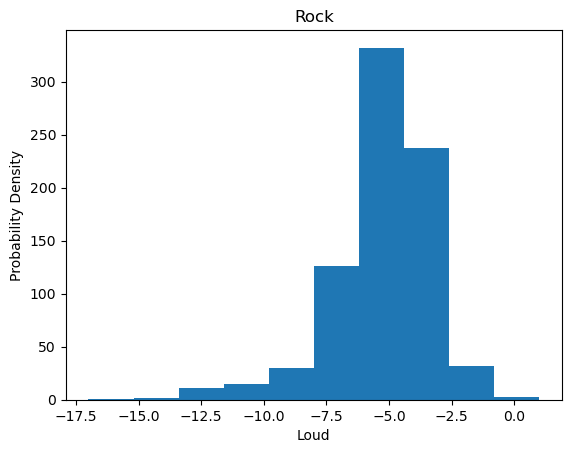

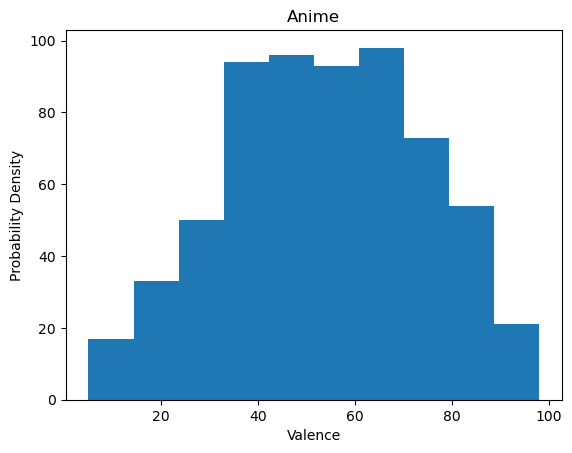

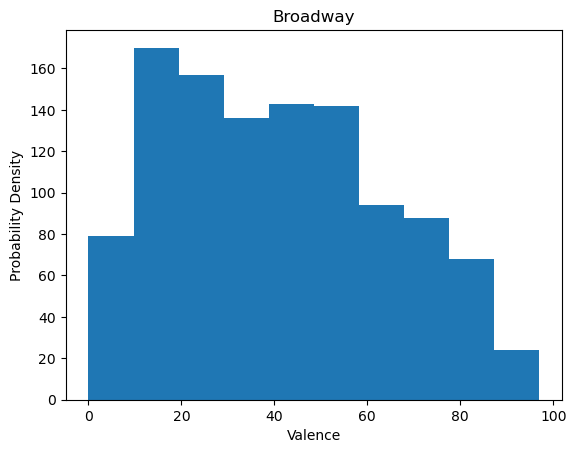

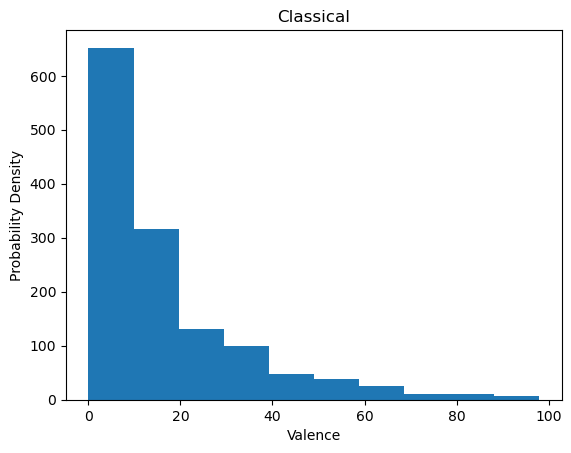

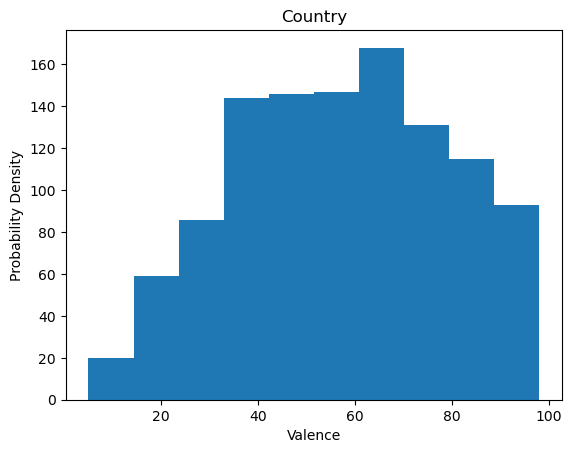

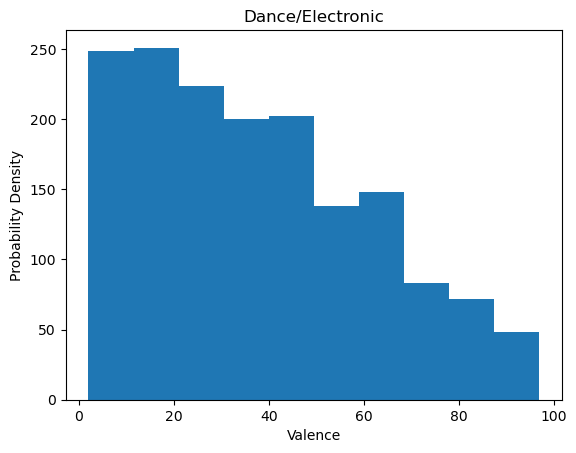

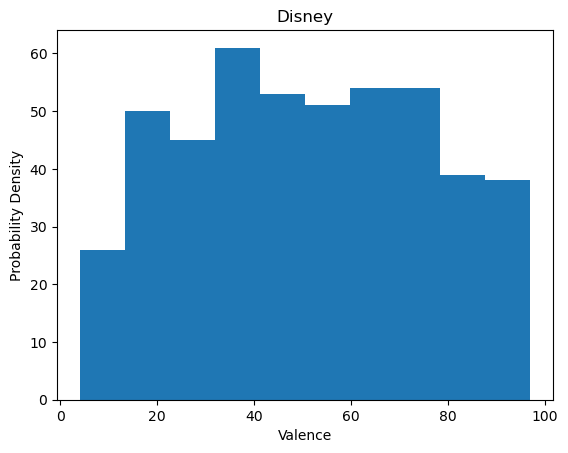

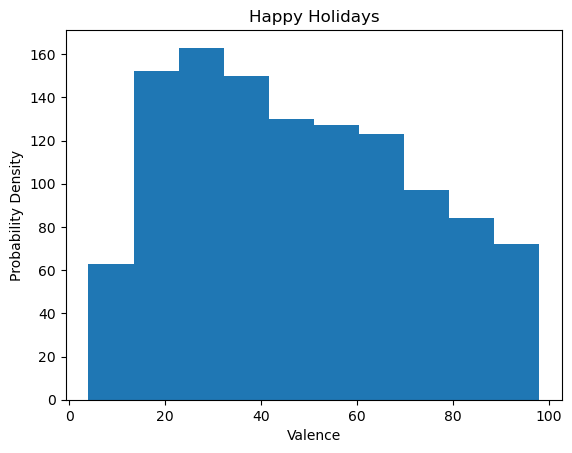

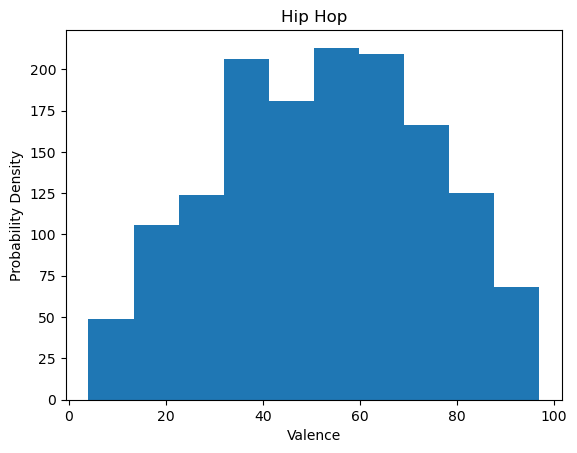

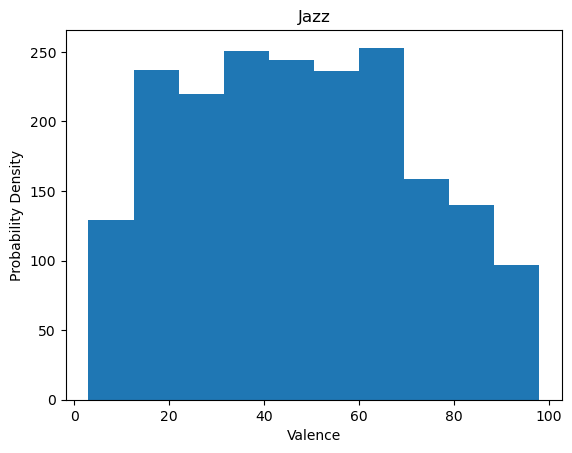

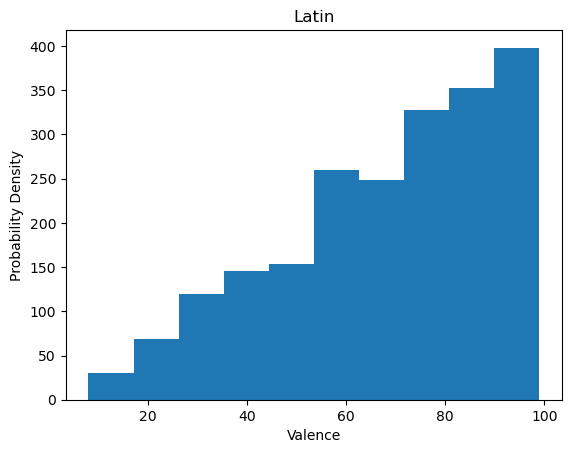

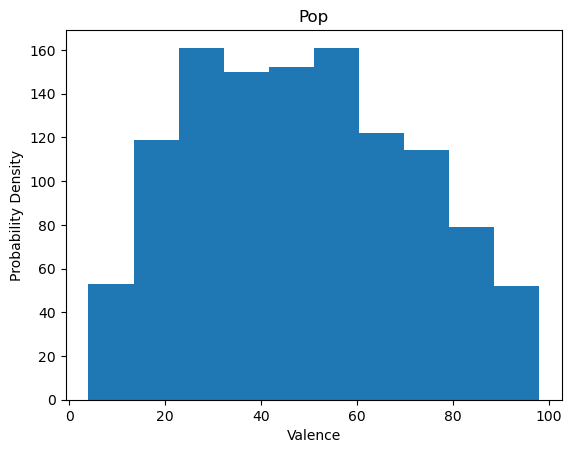

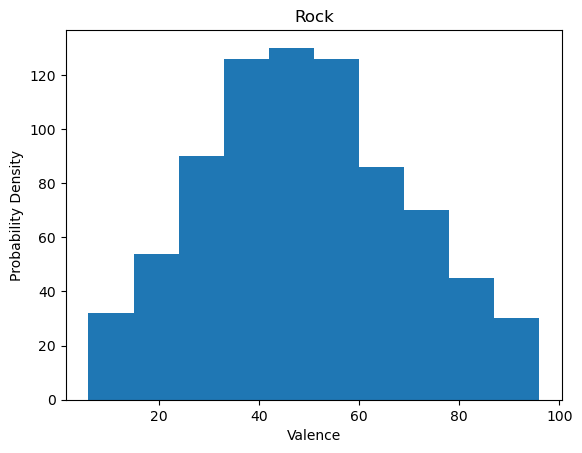

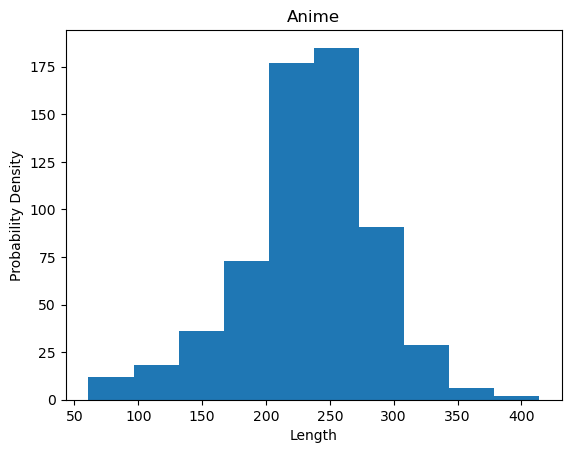

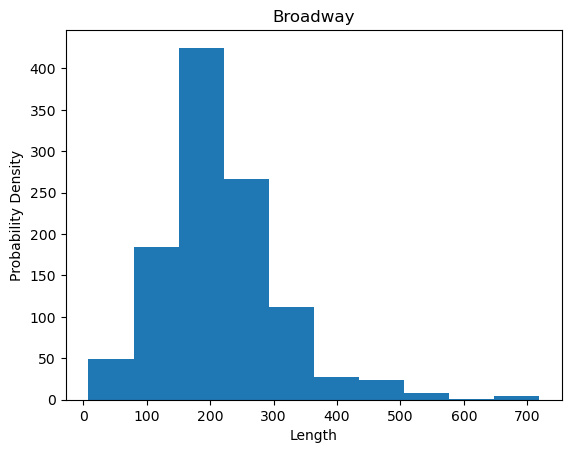

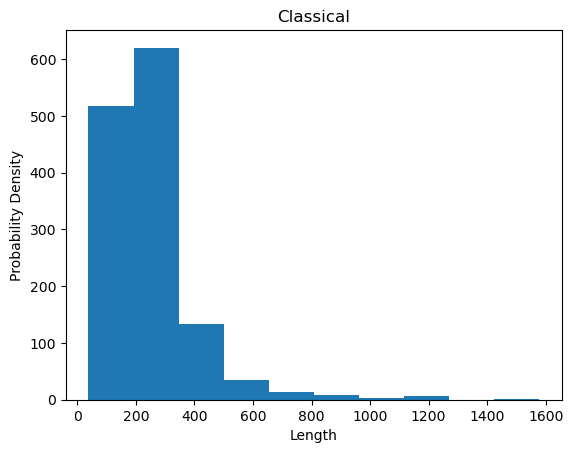

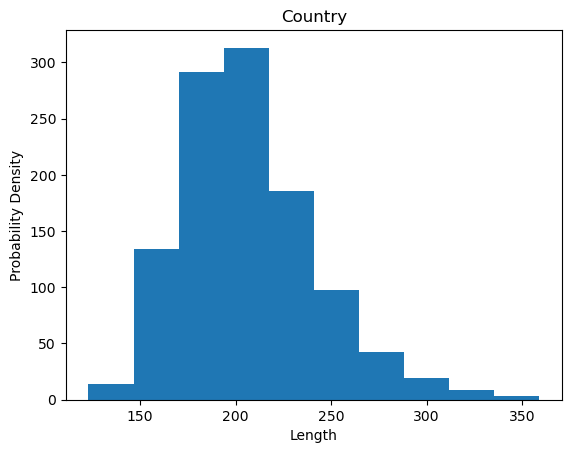

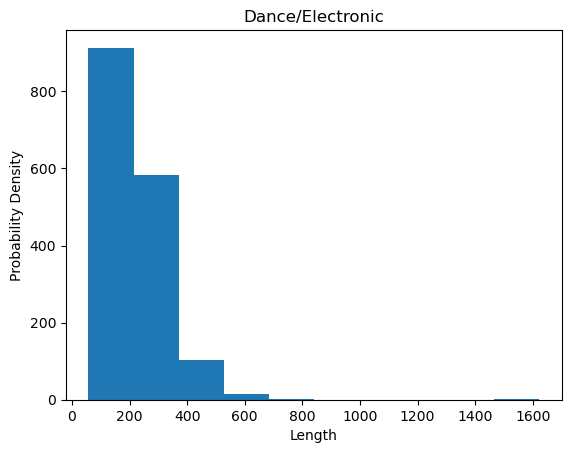

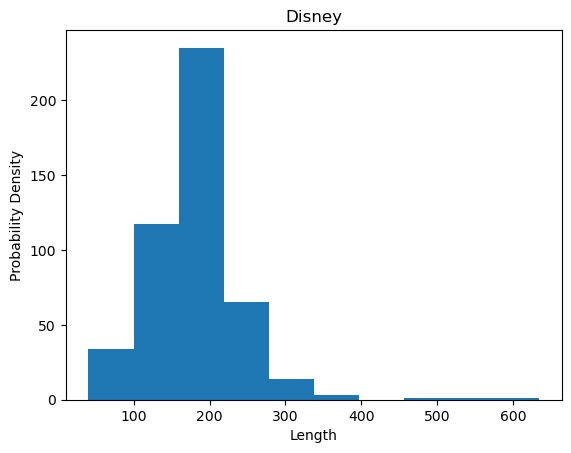

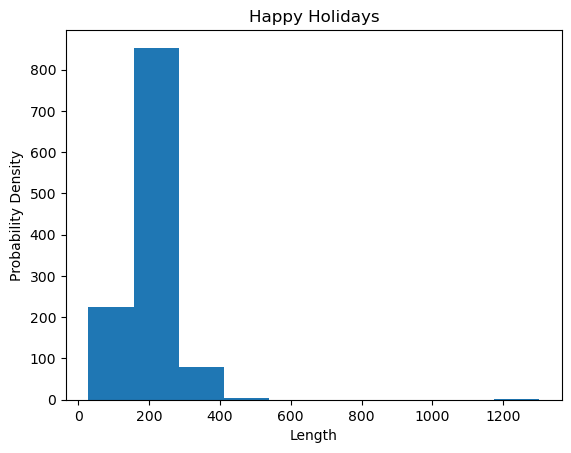

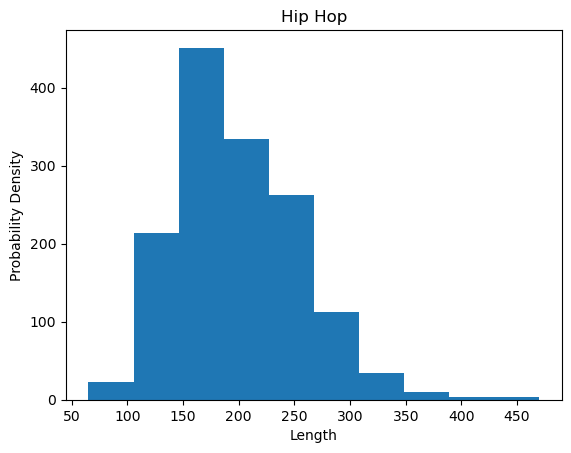

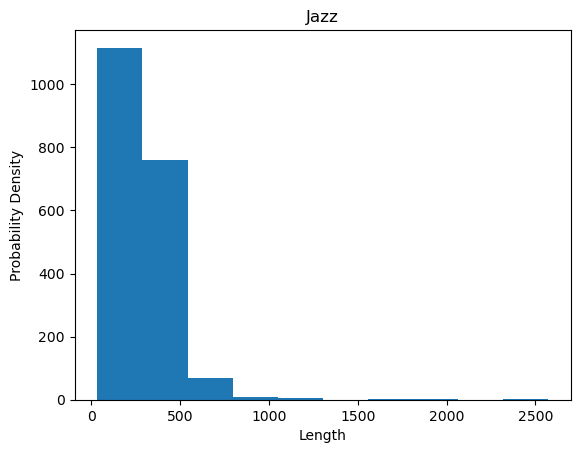

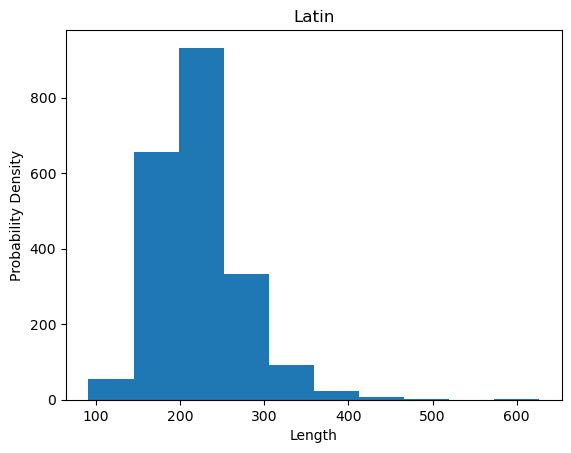

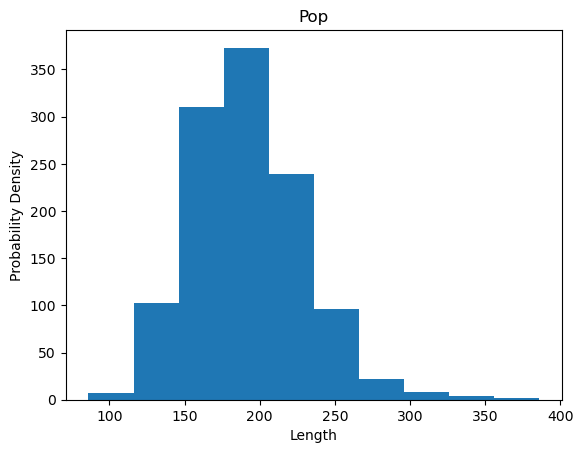

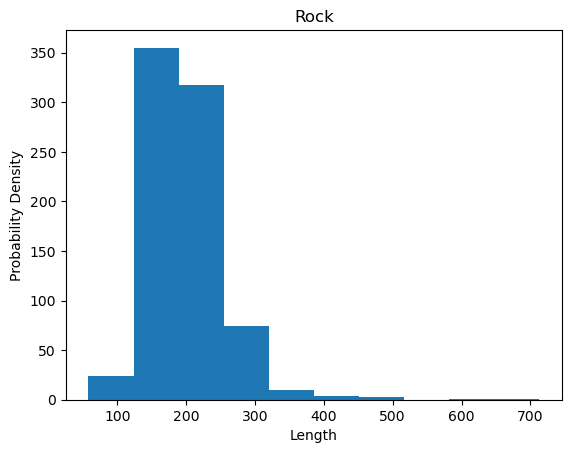

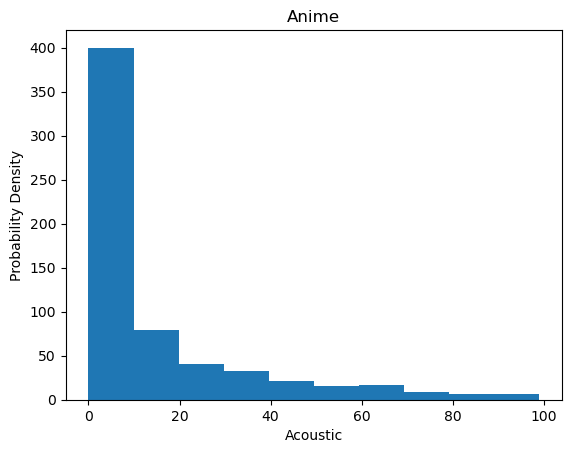

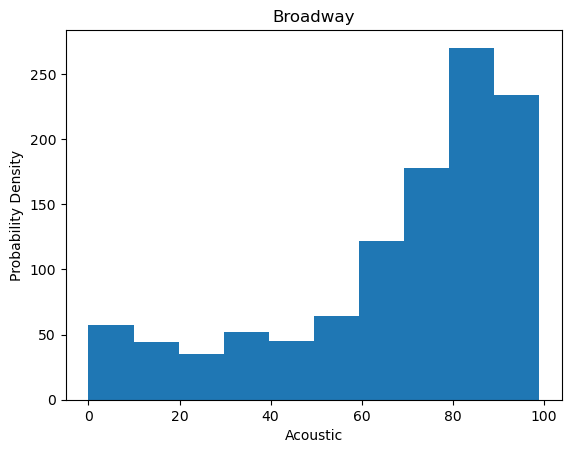

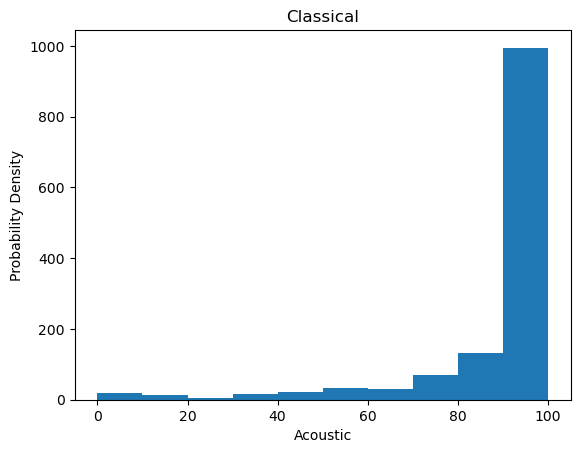

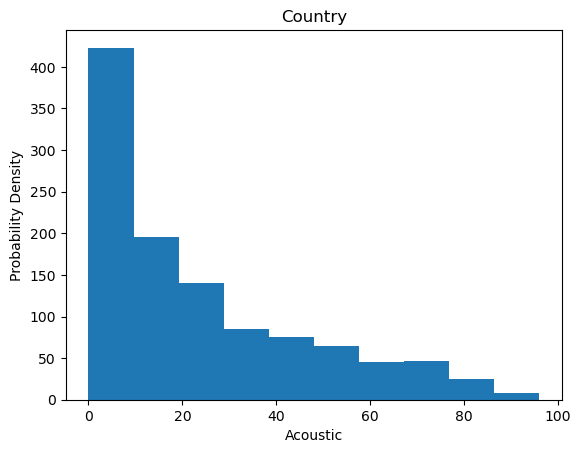

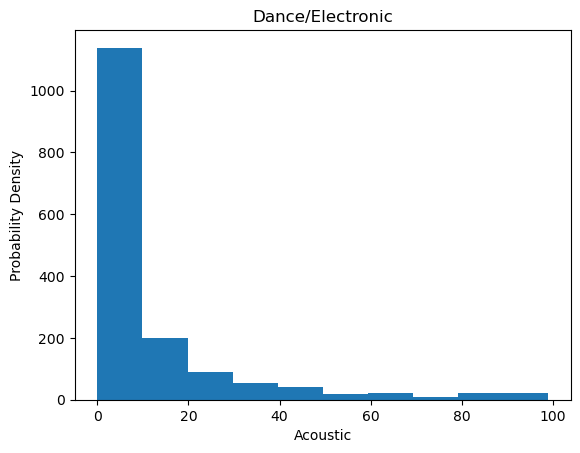

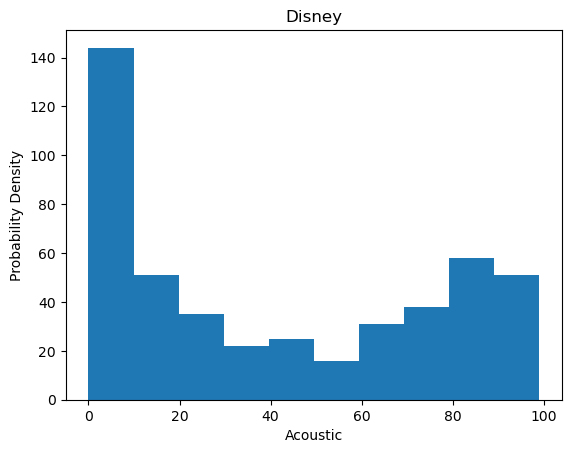

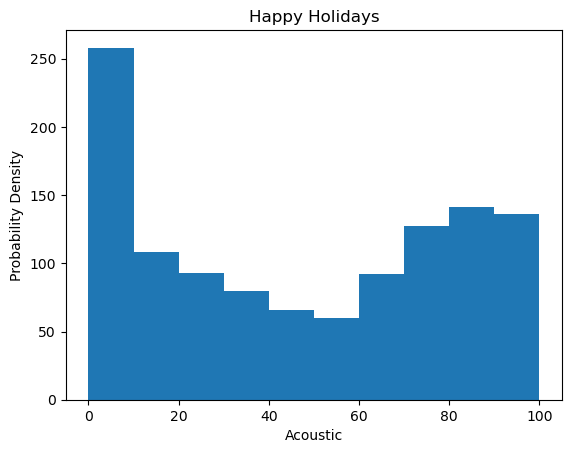

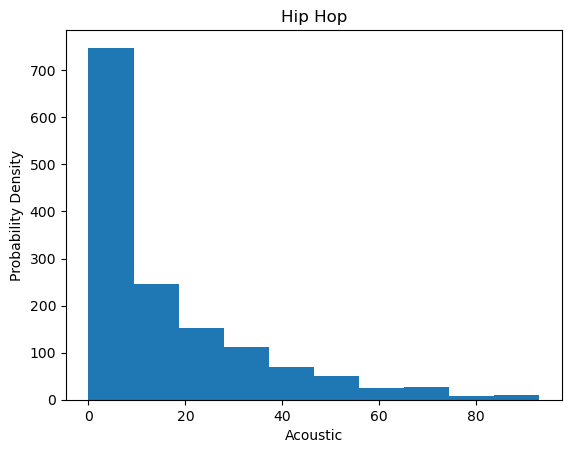

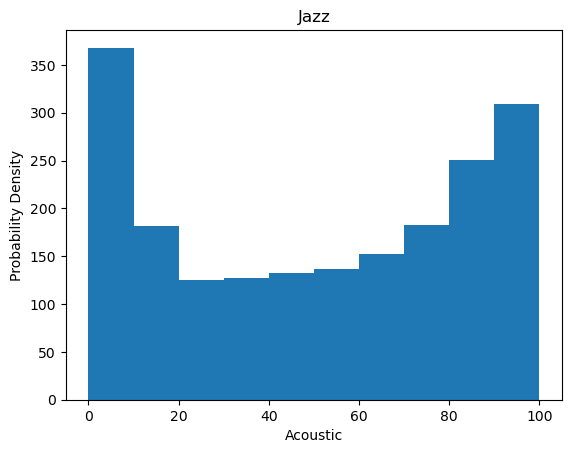

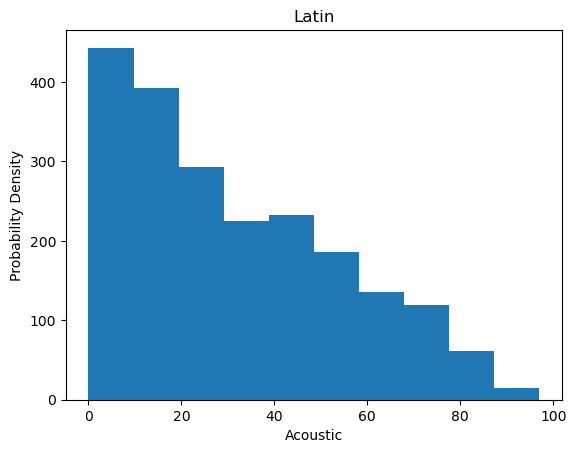

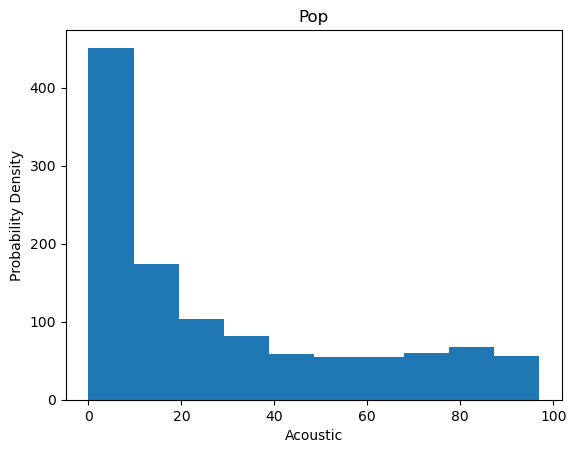

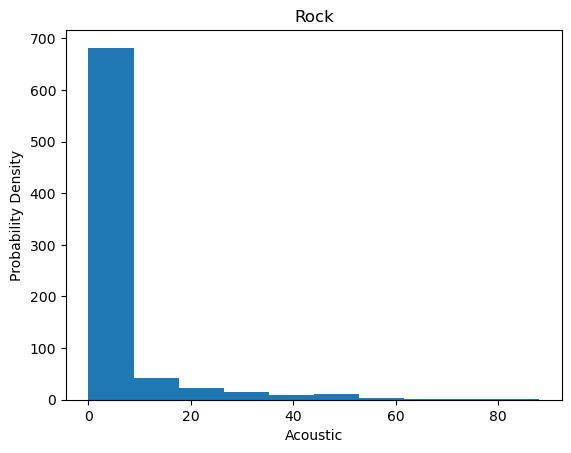

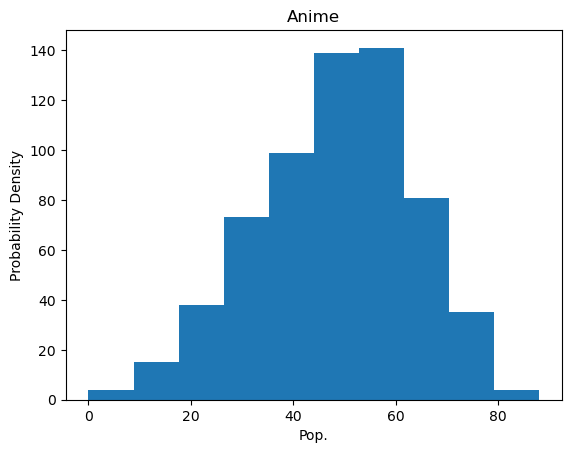

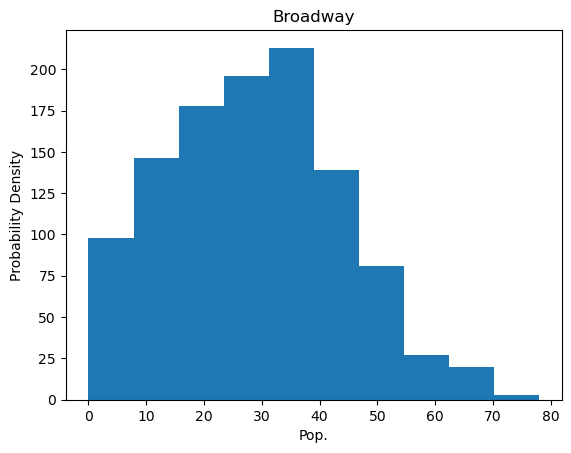

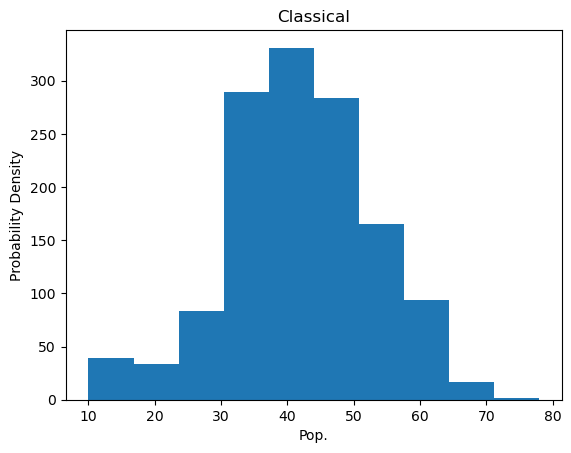

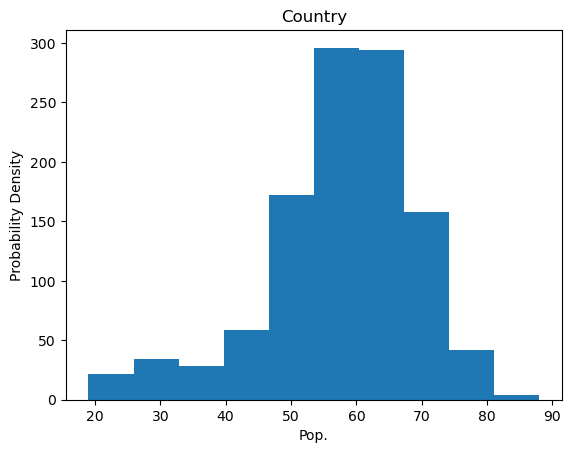

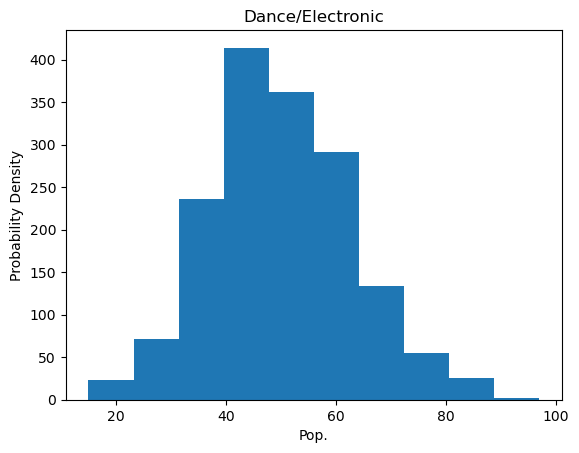

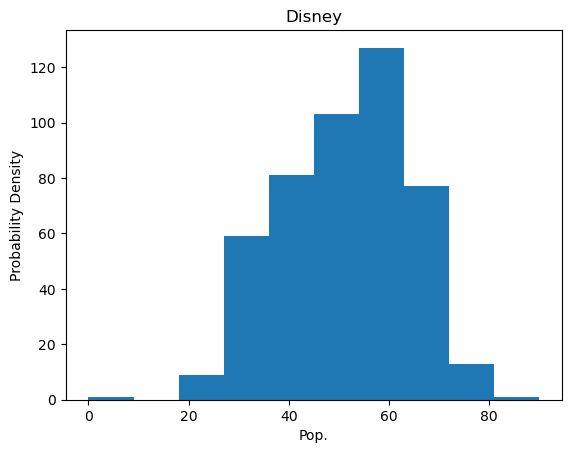

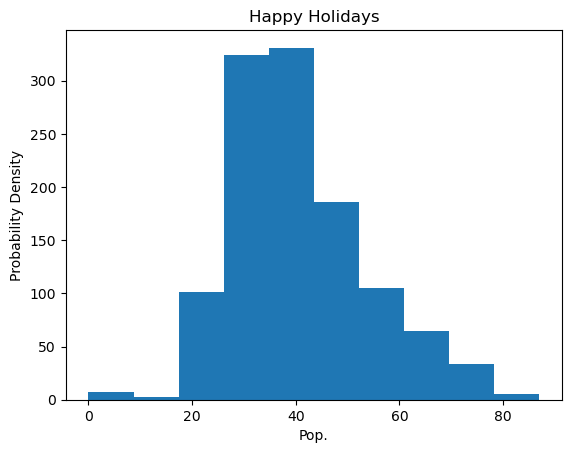

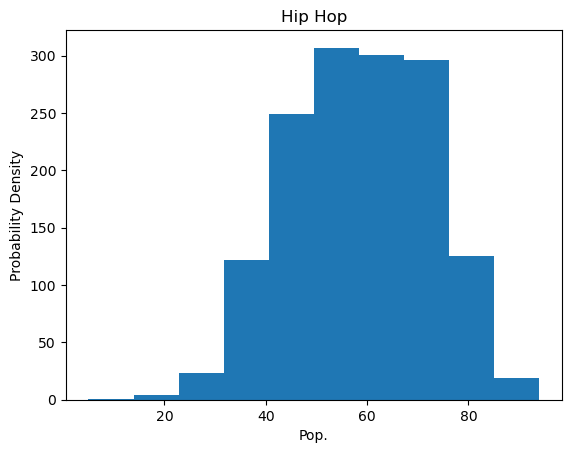

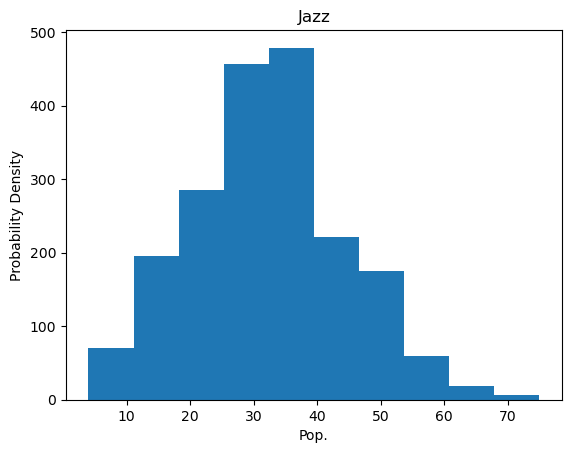

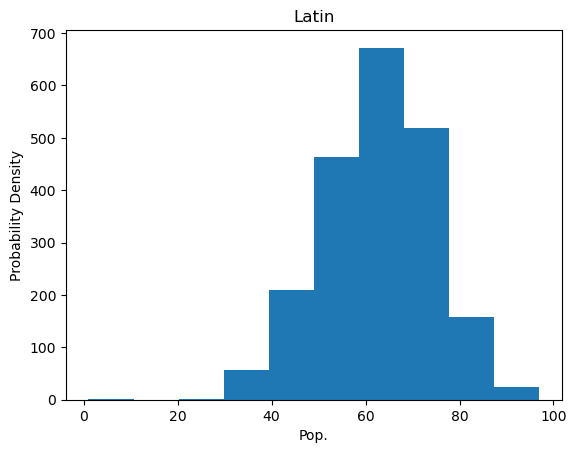

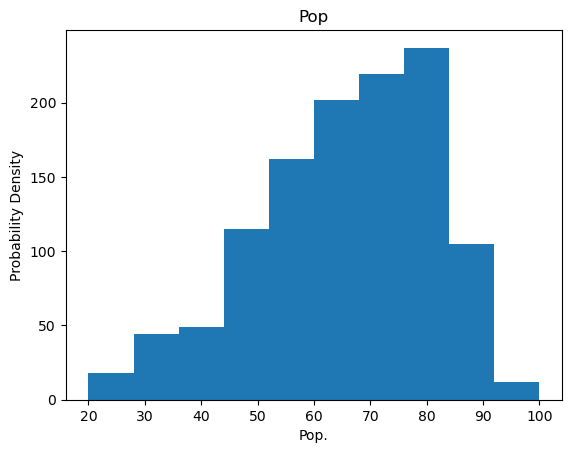

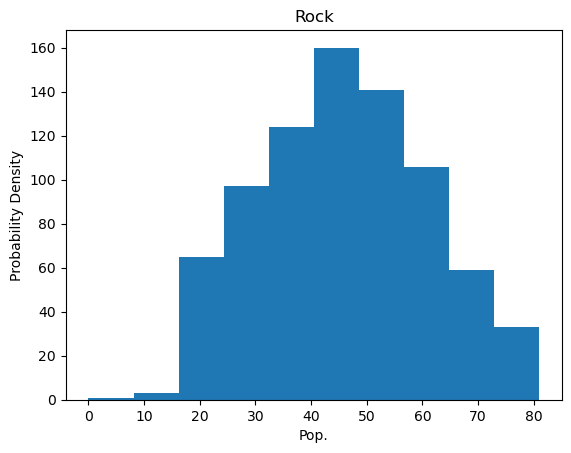

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_53596/683533794.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


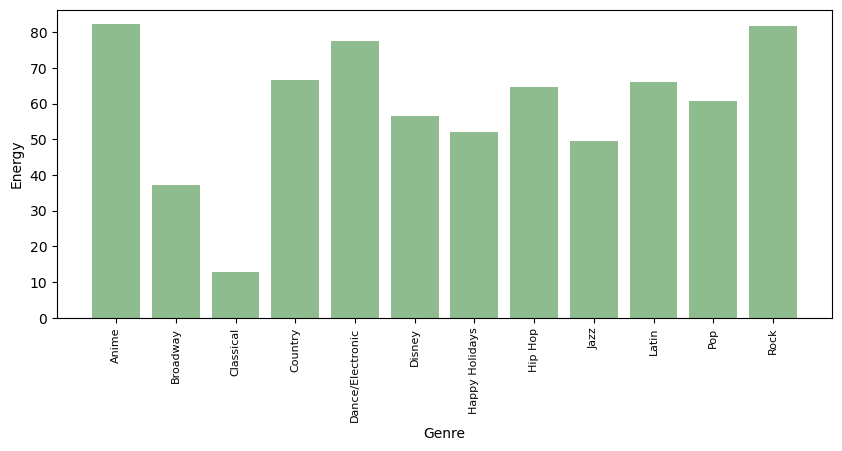

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_53596/683533794.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


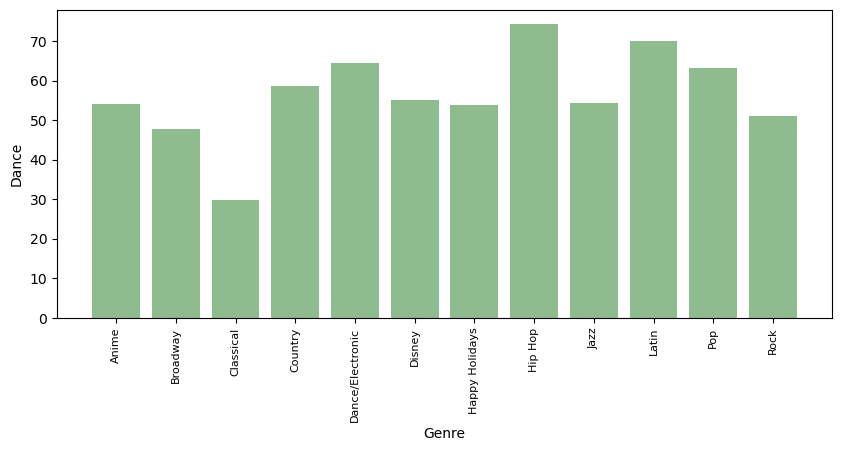

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_53596/683533794.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


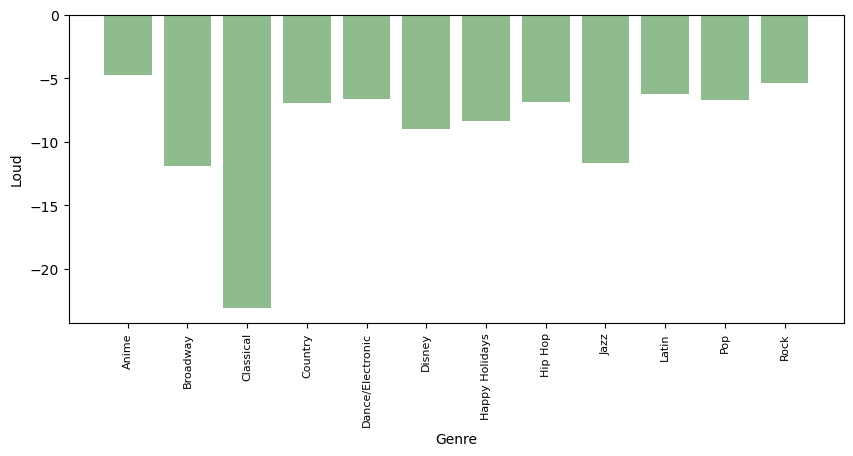

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_53596/683533794.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


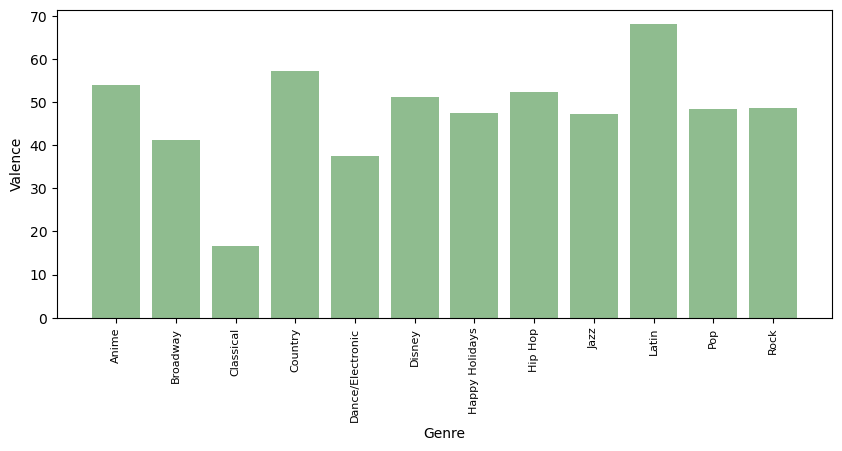

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_53596/683533794.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


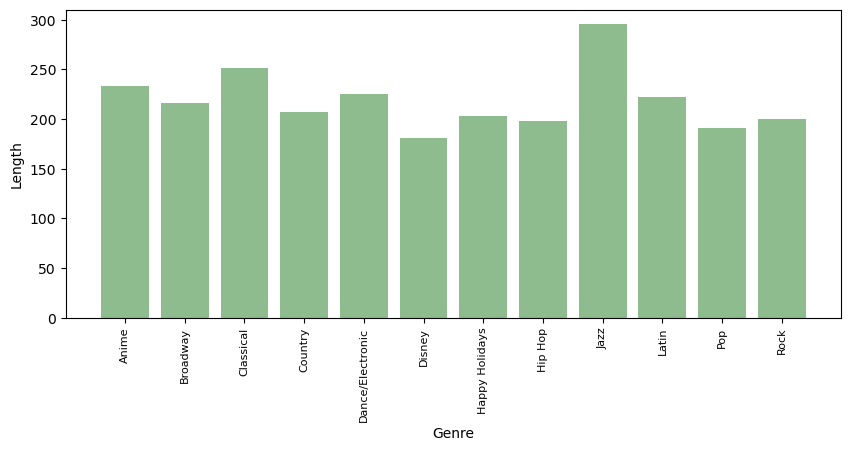

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_53596/683533794.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


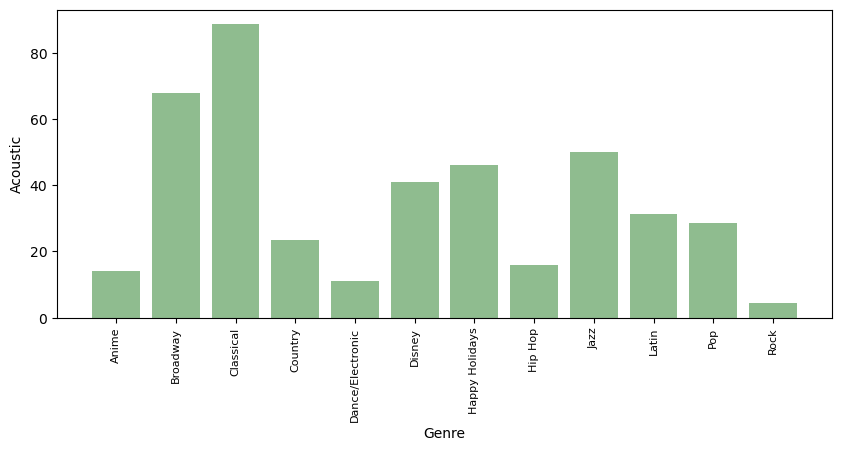

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_53596/683533794.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


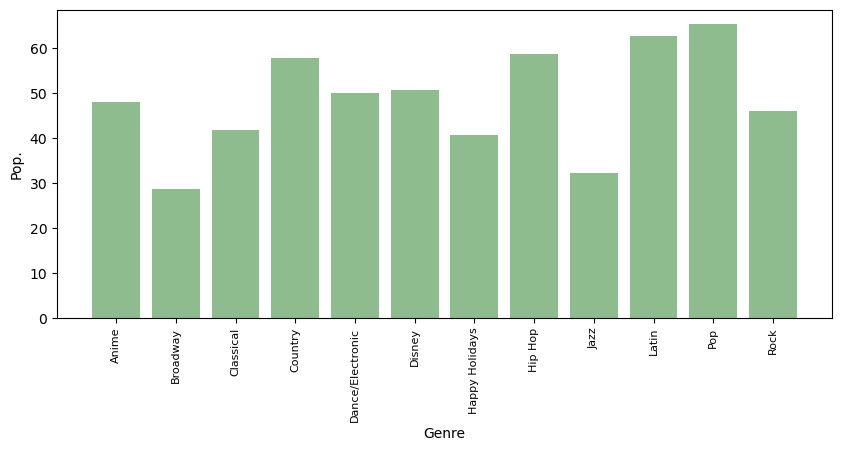

In [139]:
#PLOTS

#each genre's attribute histogram
for attribute in attributes:
    for genre in genres:
        filtered_df = inference_df[(inference_df.Genre == genre)]
        plt.hist(filtered_df[attribute])
        plt.ylabel("Probability Density")
        plt.xlabel(attribute)
        plt.title(genre)
        plt.show()

#histogram comparing genres
for attribute in attributes: 
    fig, ax = plt.subplots(figsize=(10,4))
    ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)
    X = inference_df.groupby(inference_df['Genre']).mean().reset_index()
    plt.bar(range(len(X)), X[attribute], color="darkseagreen")
    plt.xticks(range(len(X)), X['Genre'])
    plt.ylabel(attribute)
    plt.xlabel('Genre')
    plt.show()

In [171]:
used_genre_attribute_combos = np.empty(0)
used_genre_attribute_combos 

array([], dtype=float64)

In [213]:
# Welch's t-test of all the combos of genres and featureS
used_genre_attribute_combos = np.empty(0)
genre1_list = np.empty(0)
genre2_list = np.empty(0)
attribute_list = np.empty(0)
result_list = np.empty(0)
effect_size_list = np.empty(0)

for attribute in attributes:
    for genre1 in genres: 
        for genre2 in genres:
            if genre1 == genre2 or (genre1 + genre2 + attribute) in used_genre_attribute_combos:
                continue
            else:
                filtered_df1 = inference_df[(inference_df.Genre == genre1)]
                filtered_df2 = inference_df[(inference_df.Genre == genre2)]
                genre1_attribute_list = np.array(filtered_df1.loc[:,attribute])
                genre2_attribute_list = np.array(filtered_df2.loc[:,attribute])
                combined_genres_attribute_list = pd.concat([filtered_df1.loc[:,attribute], filtered_df2.loc[:,attribute]], axis=0) 
                effect_size = np.absolute((np.mean(genre1_attribute_list) - np.mean(genre2_attribute_list))/np.std(combined_genres_attribute_list))                      
                result = stats.ttest_ind(genre1_attribute_list, genre2_attribute_list, equal_var=False)
                
                #lists of results
                genre1_list = np.append(genre1_list, genre1)
                genre2_list = np.append(genre2_list, genre2)
                attribute_list = np.append(attribute_list, attribute)
                result_list = np.append(result_list, result.pvalue)
                effect_size_list = np.append(effect_size_list, effect_size)                       
                used_genre_attribute_combos = np.append(used_genre_attribute_combos,(genre2 + genre1 + attribute))
                
d = {'Genre 1': genre1_list, 'Genre 2': genre2_list, 'Attribute': attribute_list, 'Welch\'s t-test p-value': result_list, 'Effect Size': effect_size_list}
# df = pd.DataFrame(data=d)
welch_t_test_result_df = pd.DataFrame(data=d).sort_values('Effect Size', ascending=False).sort_values('Welch\'s t-test p-value').reset_index()

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):                
    display(welch_t_test_result_df)
    
    
    

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_53596/1719263692.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if genre1 == genre2 or (genre1 + genre2 + attribute) in used_genre_attribute_combos:


,index,Genre 1,Genre 2,Attribute,Welch's t-test p-value,Effect Size
0,1,Anime,Classical,Energy,0.000e+00,1.950
1,194,Jazz,Rock,Loud,0.000e+00,1.301
2,156,Classical,Happy Holidays,Loud,0.000e+00,1.545
3,415,Broadway,Pop,Pop.,0.000e+00,1.536
4,346,Broadway,Hip Hop,Acoustic,0.000e+00,1.533
5,88,Classical,Dance/Electronic,Dance,0.000e+00,1.514
6,94,Classical,Pop,Dance,0.000e+00,1.514
7,430,Country,Jazz,Pop.,0.000e+00,1.499
8,13,Broadway,Dance/Electronic,Energy,0.000e+00,1.495
9,87,Classical,Country,Dance,0.000e+00,1.480


In [181]:
#ANOVA of multiple features and comparison of genres (either all or a few)



## Prediction

What attributes contribute to more streams (higher popularity score)?


## Classification

Can we decide if a song is a Christmas song based on its attributes/features?
<br>What natural clusters form based on certain attributes/features? (ideal playlist/similar vibes)